In [81]:
from pyspark.sql import SparkSession as ps
import seaborn as sns
import pyspark.sql.functions as f
import matplotlib.pyplot as plt

In [60]:
spark = ps.builder.getOrCreate()
mpg = sns.load_dataset("mpg")
df = spark.createDataFrame(mpg)

df.show()

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|                name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|   usa|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|   usa|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|   usa|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|   usa|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|   usa|         ford torino|
|15.0|        8|       429.0|     198.0|  4341|        10.0|        70|   usa|    ford galaxie 500|
|14.0|        8|       454.0|     220.0|  4354|         9.0|        70|   usa|    chevrolet impala|


Cars with the highest and lowest mpg

In [61]:
df.select(f.max(df.mpg)).show()
df.select(f.min(df.mpg)).show()

+--------+
|max(mpg)|
+--------+
|    46.6|
+--------+



+--------+
|min(mpg)|
+--------+
|     9.0|
+--------+



Highest and lowest mpg in their release decade

In [77]:
df.groupBy('model_year').max('mpg').show()
df.groupBy('model_year').min('mpg').show() 

+----------+--------+
|model_year|max(mpg)|
+----------+--------+
|        71|    35.0|
|        72|    28.0|
|        73|    29.0|
|        70|    27.0|
|        74|    32.0|
|        76|    33.0|
|        75|    33.0|
|        77|    36.0|
|        79|    37.3|
|        78|    43.1|
|        80|    46.6|
|        81|    39.1|
|        82|    44.0|
+----------+--------+

+----------+--------+
|model_year|min(mpg)|
+----------+--------+
|        71|    12.0|
|        72|    11.0|
|        73|    11.0|
|        70|     9.0|
|        74|    13.0|
|        76|    13.0|
|        75|    13.0|
|        77|    15.0|
|        79|    15.5|
|        78|    16.2|
|        80|    19.1|
|        81|    17.6|
|        82|    22.0|
+----------+--------+



Average weight per country of origin

In [73]:
df.groupby('origin').avg('weight').show()

+------+------------------+
|origin|       avg(weight)|
+------+------------------+
| japan| 2221.227848101266|
|europe|            2423.3|
|   usa|3361.9317269076305|
+------+------------------+



Avg mpg per country of origin and release year

In [78]:
df.groupby('origin', 'model_year').avg('mpg').show()

+------+----------+------------------+
|origin|model_year|          avg(mpg)|
+------+----------+------------------+
|europe|        71|             28.75|
|   usa|        73| 15.03448275862069|
| japan|        72|              24.2|
|europe|        72|              22.0|
|europe|        70|              25.2|
| japan|        71|              29.5|
|   usa|        70|15.272727272727273|
| japan|        70|              25.5|
|   usa|        71|              18.1|
|   usa|        72| 16.27777777777778|
| japan|        75|              27.5|
|europe|        76|             24.25|
| japan|        73|              20.0|
|   usa|        74|18.333333333333332|
|europe|        74|              27.0|
|   usa|        76|19.431818181818183|
|   usa|        75|             17.55|
|europe|        75|              24.5|
| japan|        74|29.333333333333332|
|europe|        73|              24.0|
+------+----------+------------------+
only showing top 20 rows



correlation between mpg and release year

In [79]:
df.stat.corr('mpg', 'model_year')

0.5792671330833097

Relationship between cylinder and horsepower

As cylinders increase so will horsepower

<BarContainer object of 398 artists>

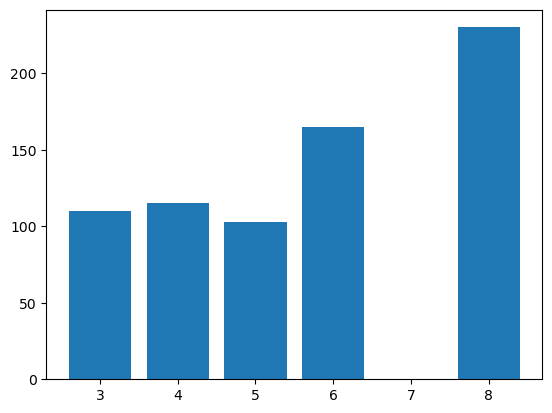

In [98]:
plt.bar(mpg['cylinders'], mpg['horsepower'])

Relationship between cylinders and acceleration

as cylinders increase, acceleration will slowly decline


<BarContainer object of 398 artists>

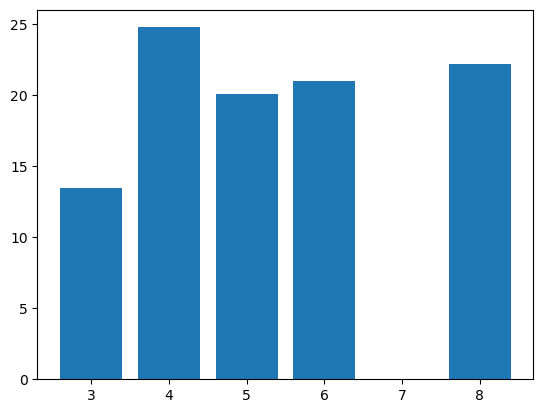

In [97]:
plt.bar(mpg['cylinders'], mpg['acceleration'])

What other factors correlate to acceleration?

One factor with a clear relationship to acceleration is weight: the lower the weight, the higher the acceleration

-0.41745731994039337

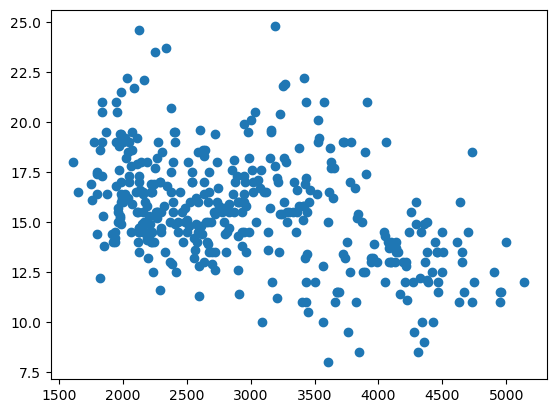

In [100]:
plt.scatter(mpg['weight'], mpg['acceleration'])
df.stat.corr('weight', 'acceleration')